# US Stock Analysis
- 포트폴리오 시각화
- 포트폴리오 수익률 분석
- 종목 검색
- 재무제표 비교

# 함수 호출

In [2]:
import numpy as np
import pandas as pd
import yfinance as yf
import FinanceDataReader as fdr
import matplotlib.pyplot as plt
import seaborn as sns
yf.pdr_override()

# 데이터 생성 및 시각화

In [142]:
# DATA INPUT 
name=['NEE','KO','UNH','TQQQ','GOOG','CLFD','STEM','LPLA','LLY']
stocknum=[0.504387,
          0.627861,
          0.077527,
          3,
          0.316421,
          0.163631,
          2,
          0.081727,
          0.116271]
price=[76.58,
       59.47,
       533.03,
       36.06,
       119.84,
       115.87,
       14.98,
       231.99,
       327.67]
date='2022-08-21'

      STOCKNUM   PRICE  HOLDQUANTITY
CLFD  0.163631  115.87     18.959924
GOOG  0.316421  119.84     37.919893
KO    0.627861   59.47     37.338894
LLY   0.116271  327.67     38.098519
LPLA  0.081727  231.99     18.959847
NEE   0.504387   76.58     38.625956
STEM  2.000000   14.98     29.960000
TQQQ  3.000000   36.06    108.180000
UNH   0.077527  533.03     41.324217


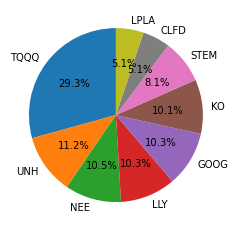

In [5]:
# DATAFRAMING
def portfolio_dataf(name,stocknum,price):
    global pf
    stocknum=np.mat(stocknum).T
    price=np.mat(price).T
    datas=np.array(np.hstack([stocknum,price]))
    pf=pd.DataFrame(index=name,data=datas,columns=['STOCKNUM','PRICE'])
    pf["HOLDQUANTITY"]=pf["PRICE"]*pf["STOCKNUM"]
    pf=pf.sort_index()
    print(pf)
    return(pf)
portfolio_dataf(name,stocknum,price)

def portfolio_plt(pf):
    pf=pf.sort_values("HOLDQUANTITY",ascending=False)
    pf_plot=plt.pie(pf["HOLDQUANTITY"],labels=pf.index,autopct='%.1f%%',startangle=90)    
    return(plt.show(pf_plot))
portfolio_plt(pf)

In [6]:
def holds_dataframing(company,date): #수익률 데이터화
    data_yf=yf.download(name,start='2022-01-01',end=date,progress=False)
    data=data_yf['Adj Close'].iloc[-1]
    data=(data/pf['PRICE']-1)*100
    df=data.sort_values(ascending=False)
    return(df)

holds_dataframing(name,date) #회사 리스트,날짜

NEE     18.137897
KO       7.112831
TQQQ     5.324458
STEM     4.005340
GOOG     2.344794
CLFD     2.045394
UNH      2.001766
LPLA    -1.900943
LLY     -5.978580
dtype: float64

# 종목 가져오기

In [139]:
# ['가정용품', '개인, 가정 용품 및 서비스', '건설 및 엔지니어링', '건설장비 및 대형차, 기차, 배',
# '건축 자재', '교육서비스', '기타 금융업', '다양한 금융서비스', '다양한 산업재 도매업', '다양한 소매업',
# '레저 상품', '메탈&마이닝', '미디어 및 출판', '반도체 및 반도체 장비', '보험', '복합 기업', '복합 유틸리티', '부동산 운영 관리',
# '비즈니스교육', '사무기기', '생명과학 및 메디컬 리서치', '석유', '섬유 및 의류', '소프트웨어 및 IT서비스', '수도 유틸리티',
# '식품 및 담배', '식품 및 약품소매', '오일 및 가스', '오일 및 가스 장비 및 서비스', '용기 및 포장', '우라늄', '우주항공 및 국방',
# '운송 인프라', '운송업', '은행', '음료', '자동차 및 자동차 부품', '재생에너지', '전기 유틸리티', '전문 및 상업 서비스', '전문품 상점',
# '전자 장비 및 부품', '제약', '종이 및 임산물', '주택 및 상업용 리츠', '주택건설', '천연가스 유틸리티', '커뮤니케이션 및 네트워킹',
# '컴퓨터, 전화 및 가전제품', '통신 서비스', '통합 하드웨어 및 소프트웨어', '투자은행 및 서비스', '핀테크', '학교',
# '헬스케어 업체 및 서비스', '헬스케어 장비 및 용품', '호텔 및 엔터테인먼트', '화물 및 물류 서비스', '화학']

date_start='2022-07-01'
def ticker_search(index,sector):
    global tf
    data_fdr = fdr.StockListing(index)
    data_fdr = dict(list(data_fdr.groupby('Industry')))
    tickers=list(data_fdr[sector]['Symbol'].values)
    downloadf=yf.download(tickers,start=date_start,end=date,progress=False)
    downloadf=downloadf['Adj Close'].iloc[-1]-downloadf['Adj Close'].iloc[0]
    tf=pd.Series(downloadf)
    tf=tf.sort_values(ascending=False)
    tf.to_excel(excel_writer="./data/%s_PROFIT_%s.xlsx"%(index,sector))
    return(tf)
ticker_search('NASDAQ','소프트웨어 및 IT서비스')
# tf[:15]

100%|█████████████████████████████████████████████████████████████████████████████| 4626/4626 [00:11<00:00, 407.74it/s]



6 Failed downloads:
- EIGI: No data found, symbol may be delisted
- MTSL: No data found, symbol may be delisted
- RHDM: No data found, symbol may be delisted
- VRTU: No data found, symbol may be delisted
- MVNR: No data found for this date range, symbol may be delisted
- TLND: No data found, symbol may be delisted


MELI    272.890015
MSTR    118.699997
PCTY     83.720016
TEAM     81.940002
MDB      77.570007
NFLX     66.290009
SNPS     59.299988
ADBE     59.000000
ADSK     50.629990
ADP      49.780014
AZPN     40.170013
CDNS     38.009995
MANH     34.329994
VRSN     34.139999
ANSS     32.330002
dtype: float64

# 제무제표 비교

In [143]:
holding = ['NEE','UNH','GOOG','CLFD','LPLA','LLY','DECK']
view=['CLFD','LRCX']
finan=[]

def financial_shape(ticker):
    ticker_yf=yf.Ticker(ticker)
    info=ticker_yf.info
    finan.append([info["trailingPE"],
                  info["forwardPE"],
                  info["priceToBook"],
                  info["pegRatio"],
                  info["returnOnEquity"],
                  info["revenuePerShare"],
                  info["totalCashPerShare"],
                  info["quickRatio"]])
# info["trailingPE"],

def financial_comparison(tickerlist):
    for i in tickerlist: 
        financial_shape(i)
    df=pd.DataFrame(data=finan,index=tickerlist,columns=['PER','FPER','PBR','PEGR','ROE','EPS','CPS','qRatio'])
    df=df.sort_values('FPER',ascending=False)
    return df

financial_comparison(holding)


,PER,FPER,PBR,PEGR,ROE,EPS,CPS,qRatio
CLFD,41.706080,35.071022,12.435781,NaN,0.34121,16.076,1.313,1.619
LLY,51.478466,34.856370,35.907220,1.98,0.74290,32.163,2.911,0.664
NEE,69.007690,29.126623,4.837161,3.48,0.03738,8.905,1.456,0.298
UNH,28.647860,22.163300,7.040394,NaN,0.24253,326.129,29.896,0.667
GOOG,22.413662,20.088436,6.048131,1.73,0.29216,21.030,9.583,2.642
DECK,20.456875,15.273448,5.912819,1.14,0.31035,119.642,26.204,1.295
LPLA,36.250404,13.902726,9.726906,1.08,0.29740,102.690,9.293,2.936


# 제무제표 시각화

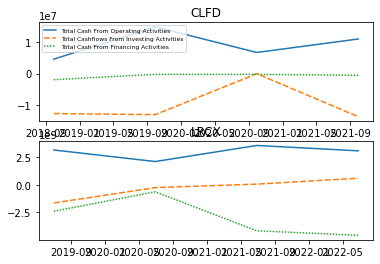

In [130]:
def plt_balance(tickerlist):
    fig, axs = plt.subplots(len(tickerlist))
    for i in range(0,len(tickerlist)):
        #get datas for balance sheet
        ticker_yf=yf.Ticker(tickerlist[i])
        balance=ticker_yf.balance_sheet.loc[["Total Assets","Total Liab","Total Stockholder Equity","Cash"]]
        balance=balance.transpose().sort_index()
        #plotting
        sns.lineplot(data=balance,ax=axs[i],legend=False)
        if i==0:
            axs[i].legend(["Total Assets","Total Liab","Total Stockholder Equity","Cash"],
                          loc=2,
                          prop={'size': 6})
        axs[i].set_title(tickerlist[i])
    plt.show()

def plt_cashflow(tickerlist):
    fig, axs = plt.subplots(len(tickerlist))
    for i in range(0,len(tickerlist)):
        #get datas for balance sheet
        ticker_yf=yf.Ticker(tickerlist[i])
        cashflow=ticker_yf.cashflow.loc[["Total Cash From Operating Activities",
                                         "Total Cashflows From Investing Activities",
                                         "Total Cash From Financing Activities"]]
        cashflow=cashflow.transpose().sort_index()
        sns.lineplot(data=cashflow,ax=axs[i],legend=False)
        if i==0:
            axs[i].legend(["Total Cash From Operating Activities",
                           "Total Cashflows From Investing Activities",
                           "Total Cash From Financing Activities"],
                          loc=2,
                          prop={'size': 6})
        axs[i].set_title(tickerlist[i])
    plt.show()
# plt_balance(view)
plt_cashflow(view)